In [2]:
import streamlit as st
import scipy as sp
import cv2
import numpy as np
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from PIL import Image

import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
tf.compat.v1.enable_eager_execution()

2022-01-09 10:45:48.573 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [3]:
MODEL_PATH ='model_vgg.h5'
model = load_model(MODEL_PATH)

Metal device set to: Apple M1


2022-01-09 10:45:53.813619: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-09 10:45:53.814248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [101]:
img_path = '/Users/nilavo/Internship work/IQGateway/malaria/cell_images/test/Parasitized/C128P89ThinF_IMG_20151004_131753_cell_124.png'

In [102]:
img = image.load_img(img_path, target_size=(224, 224))

In [103]:
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
#y = preprocess_input(x)

In [104]:
x.shape

(1, 224, 224, 3)

In [105]:
x[0,0,0,:]

array([0., 0., 0.], dtype=float32)

In [106]:
x=x/255

In [107]:
pred = model.predict(x)

In [108]:
pred

array([[0.63299197, 0.36700806]], dtype=float32)

In [144]:
import tensorflow.keras.backend as K

with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('block5_pool')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)


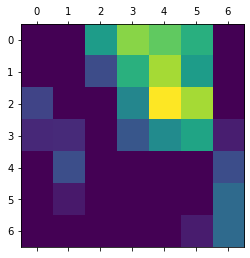

In [145]:
import matplotlib.pyplot as plt

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

2022-01-09 12:11:21.442 WARNING matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


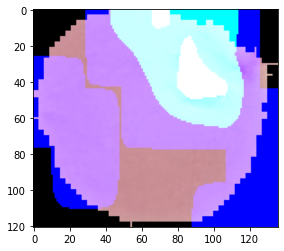

In [146]:
import cv2
#from google.colab.patches import cv2_imshow
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(img_path)
#img = cv2.imread(img_path)

INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_HOT)

img = heatmap * INTENSITY + img

imgplot = plt.imshow(img)
# cv2_imshow(cv2.imread(path))
#cv2.imshow(img)
plt.show()

In [148]:
img.shape

(121, 136, 3)

Populating the interactive namespace from numpy and matplotlib


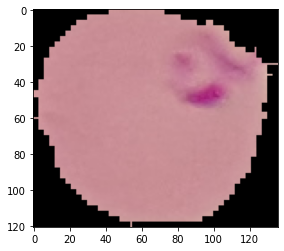

In [82]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()
